# Python for Data Science

``numpy``

# ``numpy``

- If you analyze data, a lot of your work will involve numbers / matrices.
- ``numpy`` is a data collection optimized for this work
- Without ``numpy`` much fewer scientists would have switched to Python
    - Convenience (for matrix operations)
    - Speed
- Many other libraries have adopted and extended the API of numpy
    - ``scipy``
    - ``pandas``

# ``numpy`` is fast


In [1]:
my_list = list(range(1000000))
%timeit [x * 2 for x in my_list]

78.6 ms ± 2.23 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [2]:
import numpy as np
np.random.seed(0)  # seed for reproducibility
my_arr = np.arange(1000000)
%timeit my_arr * 2

602 µs ± 25.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


# Why are ``numpy`` ndarray faster than lists

Remember how python lists can contain any type:


In [3]:
L3 = [True, "2", 3.0, 4]
[type(item) for item in L3]

[bool, str, float, int]

This can be inefficient!

![Array Memory Layout](figures/array_vs_list.png)

# ``numpy`` - Topics For Today


- *Creating arrays*: Various constructors for ``numpy`` ndarrays
- *Attributes of arrays*: Determining the size, shape, memory consumption, and data types of arrays
- *Indexing of arrays*: Getting and setting the value of individual array elements
- *Slicing of arrays*: Getting and setting smaller subarrays within a larger array
- *Fancy Indexing*: Getting and setting multiple arbitrary elements at once
- *Reshaping of arrays*: Changing the shape of a given array
- *Joining and splitting of arrays*
- *Arithmetic Operations*: +, -, *, ...
- *Aggregation functions*: min, max, sum, ...
- *Loading/Saving* 
- *Linear Algebra*: Matrix Multiplication


# Creating Arrays

In [4]:
np.array([1, 4, 2, 5, 3])

array([1, 4, 2, 5, 3])

Numpy arrays allow one type only - constructors up-cast types

In [5]:
np.array([3.14, 4, 2, 3])

array([3.14, 4.  , 2.  , 3.  ])

## Specifying data types at array creation time

In [6]:
np.array([1, 2, 3, 4], dtype='float32')

array([1., 2., 3., 4.], dtype=float32)

## Creating two-dimensional arrays

In [7]:
two_d_data = [list(range(i, i + 3)) for i in [2, 4, 6]]
two_d_data

[[2, 3, 4], [4, 5, 6], [6, 7, 8]]

In [8]:
np.array(two_d_data)

array([[2, 3, 4],
       [4, 5, 6],
       [6, 7, 8]])

![Array indexing](figures/array_indexing.png)

## Creating Arrays from Scratch

## Constant Value Arrays

In [9]:
np.zeros(10, dtype=int)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [10]:
# Create a 3x5 floating-point array filled with ones
np.ones((2, 3), dtype=float)

array([[1., 1., 1.],
       [1., 1., 1.]])

In [11]:
np.full((3, 4), 3.14)

array([[3.14, 3.14, 3.14, 3.14],
       [3.14, 3.14, 3.14, 3.14],
       [3.14, 3.14, 3.14, 3.14]])

## Linearly Spaced Values

In [12]:
# something like builtin range function
np.arange(0, 20, 2)

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

In [13]:
# Create an array of five values evenly spaced between 0 and 1
np.linspace(0, 1, 5)

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [14]:
# Create a 3x3 array of values uniformly distributed between 0 and 1
np.random.random((2, 3))

array([[0.5488135 , 0.71518937, 0.60276338],
       [0.54488318, 0.4236548 , 0.64589411]])

In [15]:
# Normally distributed random values, mean 0 and standard deviation 1
np.random.normal(0, 1, (2, 3))

array([[ 0.95008842, -0.15135721, -0.10321885],
       [ 0.4105985 ,  0.14404357,  1.45427351]])

In [16]:
# Create a 3x3 array of random integers in the interval [0, 10)
np.random.randint(0, 10, (2, 3))

array([[8, 1, 5],
       [9, 8, 9]])

## Some Array Data Types 

| Data type	    | Description |
|---------------|-------------|
| ``bool_``     | Boolean (True or False) stored as a byte |
| ``int_``      | Default integer type (same as C ``long``; normally either ``int64`` or ``int32``)| 
| ``int8``      | Byte (-128 to 127)| 
| ``int16``     | Integer (-32768 to 32767)|
| ``int32``     | Integer (-2147483648 to 2147483647)|
| ``int64``     | Integer (-9223372036854775808 to 9223372036854775807)| 
| ``uint8``     | Unsigned integer (0 to 255)| 
| ``uint16``    | Unsigned integer (0 to 65535)| 
| ``uint32``    | Unsigned integer (0 to 4294967295)| 
| ``uint64``    | Unsigned integer (0 to 18446744073709551615)| 
| ``float_``    | Shorthand for ``float64``.| 
| ``float16``   | Half precision float: sign bit, 5 bits exponent, 10 bits mantissa| 
| ``float32``   | Single precision float: sign bit, 8 bits exponent, 23 bits mantissa| 
| ``float64``   | Double precision float: sign bit, 11 bits exponent, 52 bits mantissa| 


## More Array Data Types 

- Complex numbers
    - not the most relevant data type for data scientists
- Structured arrays with compound types
    - see e.g. [Jake VanderPlas' Python Data Science Handbook chapter](https://jakevdp.github.io/PythonDataScienceHandbook/02.09-structured-data-numpy.html) 
    - these types of data are best stored and dealt with in a [pandas DataFrame](http://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.html)

# Array Attributes

In [17]:
x1 = np.random.randint(10, size=6)  # One-dimensional array
x2 = np.random.randint(10, size=(3, 4))  # Two-dimensional array
x3 = np.random.randint(10, size=(3, 4, 5))  # Three-dimensional array

## Basic Attributes

- ``ndim``: the number of dimensions
- ``shape``: the size of each dimension
- ``size``: the total size of the array
- ``dtype``: data type of array elements
- ``itemsize``: size (in bytes) of each element
- ``nbytes``: size (in bytes) of entire array

In [18]:
print("x3 ndim: ", x3.ndim)
print("x3 shape:", x3.shape)
print("x3 size: ", x3.size)
print("x3 dtype: ", x3.dtype)
print("x3 itemsize: ", x3.itemsize)
print("x3 nbytes: ", x3.nbytes)

x3 ndim:  3
x3 shape: (3, 4, 5)
x3 size:  60
x3 dtype:  int64
x3 itemsize:  8
x3 nbytes:  480


## Array Indexing and Slicing

Arrays are indexed like this:

``` python
x[index]
```

and sliced like this:

``` python
x[start:stop:step]
```

With defaults ``start=0``, ``stop=``*``size of dimension``*, ``step=1``.

### One Dimensional Arrays

Indexing is just the same as python list indexing:

In [19]:
x1

array([4, 3, 0, 3, 5, 0])

In [20]:
x1[0]

4

In [21]:
x1[-1]

0

### Slicing

You can extract subarrays using standard python List slicing:

In [22]:
x = np.arange(10)
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [23]:
x[:5]  # first five elements

array([0, 1, 2, 3, 4])

In [24]:
x[5:7] # subarray in the middle

array([5, 6])

In [25]:
x[::3] # every third element

array([0, 3, 6, 9])

### Two Dimensional Arrays

Items can be accessed using a comma-separated tuple of indices:

In [26]:
x2

array([[2, 3, 8, 1],
       [3, 3, 3, 7],
       [0, 1, 9, 9]])

In [27]:
x2[0, 0]

2

In [28]:
x2[2,-1]

9

### Slicing Two Dimensional Arrays

Same as with lists and one-dimensional arrays:

In [29]:
x2

array([[2, 3, 8, 1],
       [3, 3, 3, 7],
       [0, 1, 9, 9]])

In [30]:
x2[0,:] # entire first row

array([2, 3, 8, 1])

In [31]:
x2[0] # same as x2[0, :]

array([2, 3, 8, 1])

In [32]:
x2[:,0] # entire first column

array([2, 3, 0])

In [33]:
x2

array([[2, 3, 8, 1],
       [3, 3, 3, 7],
       [0, 1, 9, 9]])

In [34]:
x2[:2, :3]  # two rows, three columns

array([[2, 3, 8],
       [3, 3, 3]])

In [35]:
x2[:3, ::2]  # all rows, every other column

array([[2, 8],
       [3, 3],
       [0, 9]])

In [36]:
x2[::-1, ::-1] # reversing both dimensions

array([[9, 9, 1, 0],
       [7, 3, 3, 3],
       [1, 8, 3, 2]])

![Array indexing](figures/array_indexing_examples.png)

## Subarrays are Views - Not Copies

Remember: Lists slices are copies

In [37]:
L = [1,2,3]
LL = L[:2]
LL[0] = 99
print("L: ",L, "\nLL: ", LL)

L:  [1, 2, 3] 
LL:  [99, 2]


This is different for subarrays: Those slices are **views**

In [38]:
a = np.array([1,2,3])
aa = a[:2]
aa[0] = 99
print("a: ", a, "\naa: ", aa)

a:  [99  2  3] 
aa:  [99  2]


## Boolean Indexing

You can efficiently index arrays using boolean masks

In [39]:
grid = np.arange(1, 10)
grid

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [40]:
grid > 5

array([False, False, False, False, False,  True,  True,  True,  True])

In [41]:
grid[grid > 5]

array([6, 7, 8, 9])

## Fancy Indexing

Can give you arbitrary subsets of arrays given a set of indices

In [42]:
x = np.random.randint(100, size=10)
print(x)

[98 42 77 21 73  0 10 43 58 23]


In [43]:
[x[1], x[4]]

[42, 73]

In [44]:
ind = [1,4]
x[ind]

array([42, 73])

# Reshaping

Often you need to change the shape of an array; this is done with ``reshape``

In [45]:
grid = np.arange(1, 10)
grid

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [46]:
grid = grid.reshape((3, 3))
grid

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [47]:
row_vector = np.arange(3).reshape((1, 3))
row_vector

array([[0, 1, 2]])

In [48]:
column_vector = np.arange(3).reshape((3, 1))
column_vector

array([[0],
       [1],
       [2]])

# Concatenation

In [49]:
x = np.array([1, 2, 3])
y = np.array([3, 2, 1])
np.concatenate([x, y])

array([1, 2, 3, 3, 2, 1])

In [50]:
np.hstack([x, y])

array([1, 2, 3, 3, 2, 1])

In [51]:
np.vstack([x, y])

array([[1, 2, 3],
       [3, 2, 1]])

# Splitting

In [52]:
x = [1, 2, 3, 99, 99, 3, 2, 1]
x1, x2, x3 = np.split(x, [3, 5])
print(x1, x2, x3)

[1 2 3] [99 99] [3 2 1]


# Repeated Executions Are Slow In Python

In [53]:
def compute_reciprocals(values):
    output = np.empty(len(values))
    for i in range(len(values)):
        output[i] = 1.0 / values[i]
    return output
        
values = np.random.randint(1, 10, size=5)
compute_reciprocals(values)

array([0.33333333, 0.33333333, 0.25      , 0.25      , 0.33333333])

In [54]:
big_array = np.random.randint(1, 100, size=1000000)
%timeit compute_reciprocals(big_array)

2.19 s ± 96.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


# Fast Vectorized Computations with UFuncs

- Python's defacult implementation CPython is slow for repeated executions
- This is mostly due to the fact that it's not compiled down to bytecode
- Major Bottlenecks are: type-checking and function dispatches
- Various attempts to address this weakness: 
    - [PyPy](http://pypy.org/), just-in-time compiled implementation of Python
    - [Cython](http://cython.org), converts Python code to compilable C code
    - [Numba](http://numba.pydata.org/), converts snippets of Python code to fast LLVM bytecode.
- None of these have reached broad adoption
- ``numpy`` is fast since it allows to *vectorize* operations through NumPy's *universal functions* (ufuncs)
- For many tasks you can use plain python and ``numpy`` for efficient computations

In [55]:
1.0 / values # vectorized, fast reciprocal computation with ufuncs

array([0.33333333, 0.33333333, 0.25      , 0.25      , 0.33333333])

In [56]:
%timeit (1.0 / big_array)

1.14 ms ± 36 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


## Most arithmetic operations are available as ufuncs

In [57]:
x = np.arange(4)
print("x     =", x)
print("x + 5 =", x + 5)
print("x - 5 =", x - 5)
print("x * 2 =", x * 2)
print("x / 2 =", x / 2)
print("x // 2 =", x // 2)  # floor division

x     = [0 1 2 3]
x + 5 = [5 6 7 8]
x - 5 = [-5 -4 -3 -2]
x * 2 = [0 2 4 6]
x / 2 = [0.  0.5 1.  1.5]
x // 2 = [0 0 1 1]


## ``ufunc`` Arithmetic Operators and Shortcuts

| Operator	    | Equivalent ufunc    | Description                           |
|---------------|---------------------|---------------------------------------|
|``+``          |``np.add``           |Addition (e.g., ``1 + 1 = 2``)         |
|``-``          |``np.subtract``      |Subtraction (e.g., ``3 - 2 = 1``)      |
|``-``          |``np.negative``      |Unary negation (e.g., ``-2``)          |
|``*``          |``np.multiply``      |Multiplication (e.g., ``2 * 3 = 6``)   |
|``/``          |``np.divide``        |Division (e.g., ``3 / 2 = 1.5``)       |
|``//``         |``np.floor_divide``  |Floor division (e.g., ``3 // 2 = 1``)  |
|``**``         |``np.power``         |Exponentiation (e.g., ``2 ** 3 = 8``)  |
|``%``          |``np.mod``           |Modulus/remainder (e.g., ``9 % 4 = 1``)|

# Aggregation Functions

When working with large data sets, aggregations help to understand your data:

- Summing all values
- Min/Max 
- Quantiles
- Mean/Median

Again, python itself is slow at that, but ``numpy`` is fast

In [58]:
L = np.arange(10)
L

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [59]:
sum(L)

45

In [60]:
np.sum(L)

45

In [61]:
big_array = np.random.rand(1000000)
big_list = big_array.tolist()
%timeit sum(big_list)
%timeit np.sum(big_array)

3.66 ms ± 318 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
347 µs ± 15.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


|Function Name      |   NaN-safe Version  | Description                                   |
|-------------------|---------------------|-----------------------------------------------|
| ``np.sum``        | ``np.nansum``       | Compute sum of elements                       |
| ``np.prod``       | ``np.nanprod``      | Compute product of elements                   |
| ``np.mean``       | ``np.nanmean``      | Compute mean of elements                      |
| ``np.std``        | ``np.nanstd``       | Compute standard deviation                    |
| ``np.var``        | ``np.nanvar``       | Compute variance                              |
| ``np.min``        | ``np.nanmin``       | Find minimum value                            |
| ``np.max``        | ``np.nanmax``       | Find maximum value                            |
| ``np.argmin``     | ``np.nanargmin``    | Find index of minimum value                   |
| ``np.argmax``     | ``np.nanargmax``    | Find index of maximum value                   |
| ``np.median``     | ``np.nanmedian``    | Compute median of elements                    |
| ``np.percentile`` | ``np.nanpercentile``| Compute rank-based statistics of elements     |
| ``np.any``        | N/A                 | Evaluate whether any elements are true        |
| ``np.all``        | N/A                 | Evaluate whether all elements are true        |

### Multi dimensional aggregates

In [62]:
M = np.ones((3, 4))
M

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

In [63]:
M.sum()

12.0

In [64]:
M.sum(axis=0)

array([3., 3., 3., 3.])

In [65]:
M.sum(axis=1)

array([4., 4., 4.])

## Example: What is the Average Height of US Presidents?

In [66]:
heights = np.array([int(line.split(',')[-1]) for line in open("data/president_heights.csv").readlines()[1:]])
heights[:3]

array([189, 170, 189])

In [67]:
print("Mean height:       ", heights.mean())
print("Standard deviation:", heights.std())
print("Minimum height:    ", heights.min())
print("Maximum height:    ", heights.max())

Mean height:        179.73809523809524
Standard deviation: 6.931843442745892
Minimum height:     163
Maximum height:     193


In [68]:
print("25th percentile:   ", np.percentile(heights, 25))
print("Median:            ", np.median(heights))
print("75th percentile:   ", np.percentile(heights, 75))

25th percentile:    174.25
Median:             182.0
75th percentile:    183.0


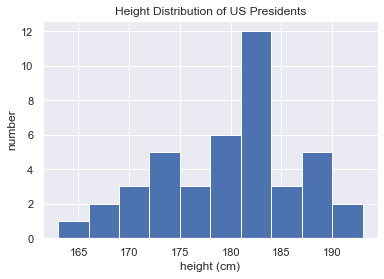

In [69]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # set plot style
plt.hist(heights)
plt.title('Height Distribution of US Presidents')
plt.xlabel('height (cm)')
plt.ylabel('number');

## Fast Sorting in NumPy: ``np.sort`` and ``np.argsort``

In [70]:
np.sort(heights)

array([163, 168, 168, 170, 170, 171, 173, 173, 173, 173, 174, 175, 175,
       177, 178, 178, 178, 178, 179, 180, 182, 182, 182, 182, 183, 183,
       183, 183, 183, 183, 183, 183, 185, 185, 185, 188, 188, 188, 189,
       189, 193, 193])

In [71]:
heights[heights.argsort()]

array([163, 168, 168, 170, 170, 171, 173, 173, 173, 173, 174, 175, 175,
       177, 178, 178, 178, 178, 179, 180, 182, 182, 182, 182, 183, 183,
       183, 183, 183, 183, 183, 183, 185, 185, 185, 188, 188, 188, 189,
       189, 193, 193])

# Saving and Loading Arrays

In [72]:
arr = np.arange(10)
np.save('some_array', arr)
loaded_arr = np.load('some_array.npy')
loaded_arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

# Linear Algebra

- For scientists, an important reason to use ``numpy`` is linear algebra:
    - Matrix arithmetic
    - Matrix multiplication
    - Solving linear systems
    - Matrix decompositions
- We will only talk about the functionalities, not the math concepts
- But we will need all of these tools in later sessions and lectures

## Matrix Multiplication

In [73]:
A = np.array([[1,1],[1,1]])
B = np.array([[2,3],[4,5]])
A.dot(B)

array([[6, 8],
       [6, 8]])

In [74]:
A @ B

array([[6, 8],
       [6, 8]])

In [75]:
(A @ B).T

array([[6, 6],
       [8, 8]])

## Example: Generating Correlated Gaussian Data

We draw isotropic gaussian variables:

$X \in R^{2,100} \sim \mathcal{N}(0,1)$

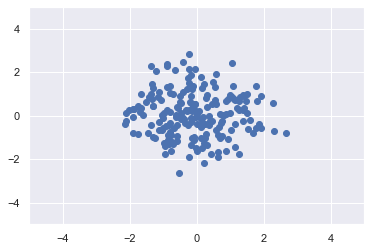

In [76]:
X = np.random.randn(2,200)
plt.scatter(X[0,:],X[1,:]);plt.xlim([-5,5]);plt.ylim([-5,5]);

In [77]:
# Covariance Matrix
X.dot(X.T)

array([[205.1305975 ,  -6.19507205],
       [ -6.19507205, 210.30138313]])

Then we scale the dimensions: 

${\begin{bmatrix}2 & 0 \\0  &0.5 \\\end{bmatrix}}X$

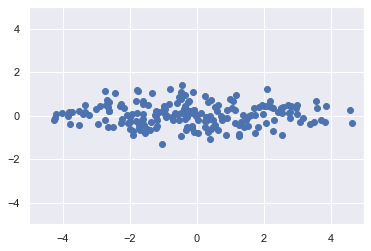

In [78]:
S = np.array([[2,0],[0,.5]])
SX = S @ X 
plt.scatter(SX[0,:],SX[1,:]);plt.xlim([-5,5]);plt.ylim([-5,5]);

Then we rotate the data by $\theta=45$ degrees

$ R=\begin{bmatrix} 
            \cos \theta & -\sin \theta \\
            \sin \theta &\cos \theta \\
    \end{bmatrix}$

(-5, 5)

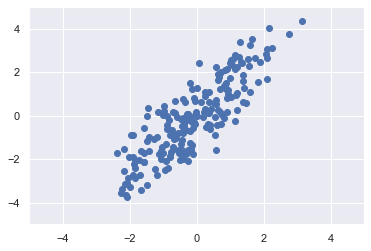

In [79]:
theta = 45
R = np.array([[np.cos(theta),-np.sin(theta)],[np.sin(theta),np.cos(theta)]])
RSX = R @ S @ X 
plt.scatter(RSX[0,:],RSX[1,:])
plt.xlim([-5,5]);plt.ylim([-5,5])

And now back to the original uncorrelated data

$X = (RS)^{-1}RS~X = {\begin{bmatrix}1 & 0 \\0  &1 \\\end{bmatrix}}X$

(-5, 5)

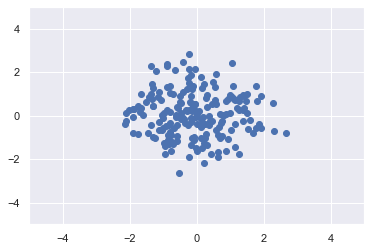

In [80]:
Xhat = np.linalg.inv(R @ S) @ RSX
plt.scatter(Xhat[0,:],Xhat[1,:])
plt.xlim([-5,5]);plt.ylim([-5,5])

Or with taking the inverse matrix square root of the data

$X = (RSX (RSX)^\top))^{-1/2}~X$

(-5, 5)

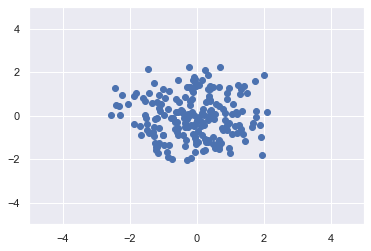

In [81]:
import scipy
Xhat = np.linalg.inv(scipy.linalg.sqrtm(RSX @ RSX.T / X.shape[-1])) @ RSX
plt.scatter(Xhat[0,:],Xhat[1,:])
plt.xlim([-5,5]);plt.ylim([-5,5])

(-5, 5)

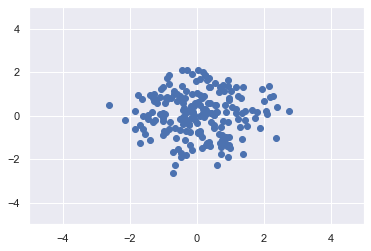

In [82]:
# or with an eigendecomposition
V,U = np.linalg.eig(RSX @ RSX.T / X.shape[-1])
Xhat = np.diag(1 / np.sqrt(V)) @ U.T @ RSX
plt.scatter(Xhat[0,:],Xhat[1,:])
plt.xlim([-5,5]);plt.ylim([-5,5])